<a href="https://colab.research.google.com/github/RajRover/ML_Projects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np

In [22]:
class Linear_Regression():
    # Constructor: initializes learning rate and number of iterations
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate   # step size for gradient descent
        self.no_of_iterations = no_of_iterations  # how many times to update weights

    # Fit method: trains the model on input data X and labels Y
    def fit(self, X, Y):
        self.m, self.n = X.shape   # m = number of samples (rows), n = number of features (columns)
        self.w = np.zeros(self.n)  # initialize weights (coefficients) with zeros
        self.b = 0                 # initialize bias as 0
        self.X = X                 # store training data
        self.Y = Y                 # store training labels

        # Run gradient descent for the given number of iterations
        for i in range(self.no_of_iterations):
            self.update_weights()

    # Update weights using gradient descent
    def update_weights(self):
        Y_prediction = self.predict(self.X)   # predicted values using current weights

        # Calculate gradients (partial derivatives of cost function w.r.t weights and bias)
        dw = -(2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m   # gradient for weights
        db = -(2 * np.sum(self.Y - Y_prediction)) / self.m           # gradient for bias

        # Update weights and bias using gradient descent
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    # Prediction function: returns predicted output for input X
    def predict(self, X):
        return X.dot(self.w) + self.b


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [24]:
salary_dataset=pd.read_csv('/content/salary_data.csv')

In [25]:
salary_dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [26]:
salary_dataset.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [10]:
salary_dataset.shape

(30, 2)

In [11]:
salary_dataset.isnull().sum()

,0
YearsExperience,0
Salary,0


In [27]:
X=salary_dataset.iloc[:,:-1].values
Y=salary_dataset.iloc[:,-1].values

In [28]:
print(X,Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] [ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)


**Training the Linear Regression model**

In [43]:
model= Linear_Regression(learning_rate=0.02, no_of_iterations=1000)
model.fit(X_train,Y_train)

In [44]:
print("weights",model.w[0])
print("bias",model.b)

weights 9514.400999035135
bias 23697.406507136307


y = 9514(x) + 23697

In [45]:
test_data_prediction=model.predict(X_test)

In [46]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


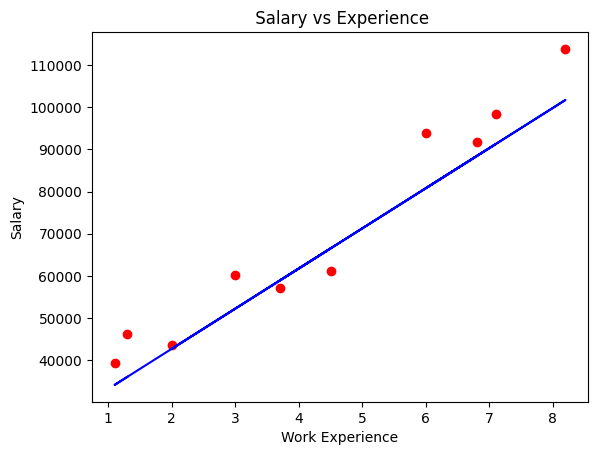

In [47]:
plt.scatter(X_test,Y_test,color='r')
plt.plot(X_test,test_data_prediction,color='b')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()